# 1. Exploratory Data Analysis

## 1.1 White noise series

### 1.1.1 Generate a white noise series with N data points (e.g. N can be 100, 1000, 5000, or 10000). Then find its actual mean, standard deviation, and draw its line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs (lags up to 40).

In [41]:
from random import gauss
from random import seed
from pandas import Series, plotting
from pandas.plotting import autocorrelation_plot

# set the random generator seed to 10 (None: current system time; int a: is used directly)
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(100)]
#print(series)
#Series: One-dimensional ndarray with axis labels (including time series)
series = Series(series)
print(series)

#mean
mean = series.mean()

# Standard Deviation

std = series.std()
print(mean, std)

0     1.288185
1     1.449446
2     0.066336
3    -0.764544
4    -1.092173
        ...   
95   -1.077087
96    0.439095
97   -1.126780
98   -0.976485
99   -0.396288
Length: 100, dtype: float64
-0.050576379210951254 0.9440133469488994


In [42]:
def plot_self(series, num_log):
    from matplotlib import pyplot
    # Line plot
    pyplot.figure()
    series.plot.line(title = 'Line plot')
    # Histogram
    pyplot.figure()
    series.plot.hist(title = 'Histogram')
    # Density plot
    pyplot.figure()
    series.plot.density()
    # Box plot
    pyplot.figure()
    series.plot.box(title = 'Box plot')
    # Lag-1 plot
    pyplot.figure()
    import pandas as pd
    pd.plotting.lag_plot(series, lag=1)
    # ACF graph

    from pandas import read_csv

    from statsmodels.graphics.tsaplots import plot_acf

    plot_acf(series, lags=num_log)
    pyplot.show()
    # PACF
    from pandas import read_csv
    from matplotlib import pyplot
    from statsmodels.graphics.tsaplots import plot_pacf

    plot_pacf(series, lags=num_log)
    pyplot.show()

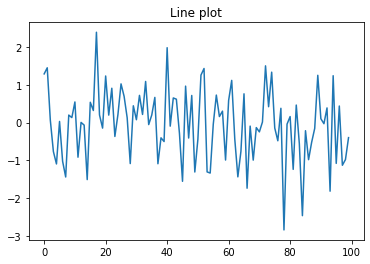

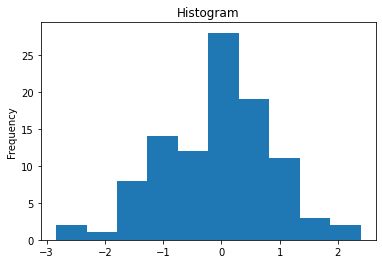

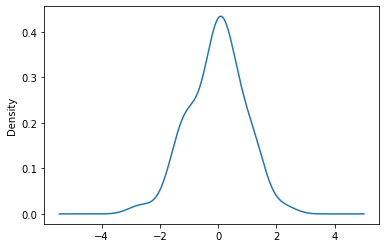

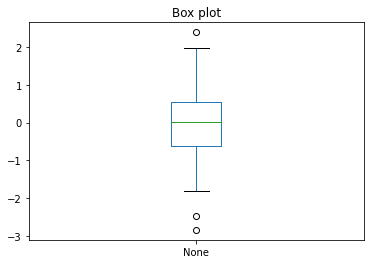

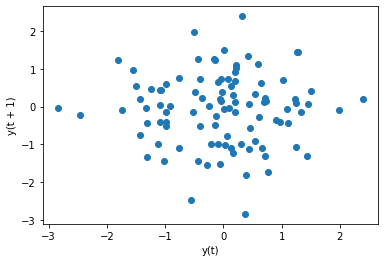

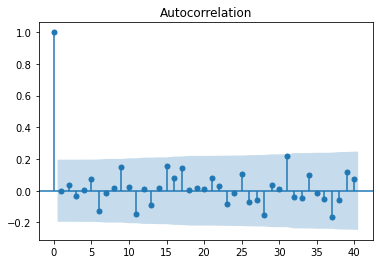

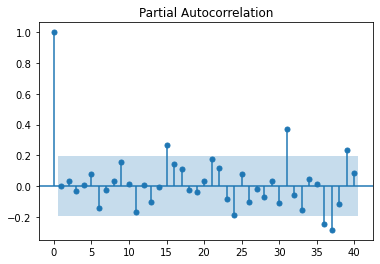

In [43]:
plot_self(series, num_log=40)

### Generate 100 random series with length 1000 data points, then use the average values at each time to produce an average value series. Then repeat the same process above.

In [44]:
series_combine = []
series_mean = []
for i in range(0,100):
    seed(i)
    series_noise = [gauss(0.0, 1.0) for i in range(1000)]
    series_combine.append(series_noise)

for i in range(0, 1000):
    total = 0
    for j in range(0, 100):
        total = total + series_combine[j][i]
    series_mean.append(total / len(series_noise))

print(len(series_mean))
series_new = Series(series_mean)

1000


In [45]:
print("Actuai mean is:", series_new.mean())
print("Standard deviation is :", series_new.std())


Actuai mean is: 0.0004170518169858112
Standard deviation is : 0.009882040818504639


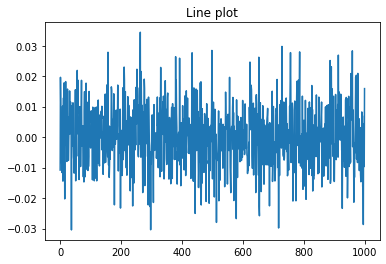

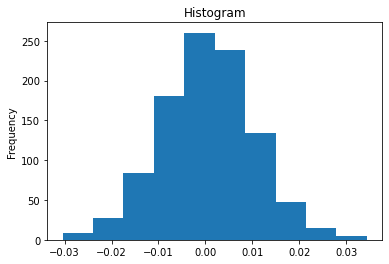

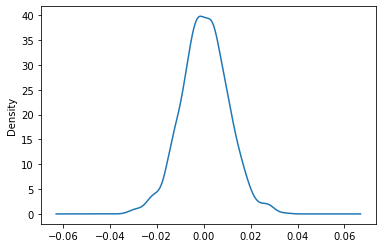

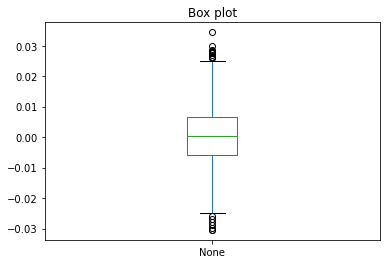

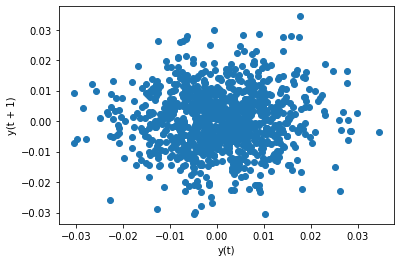

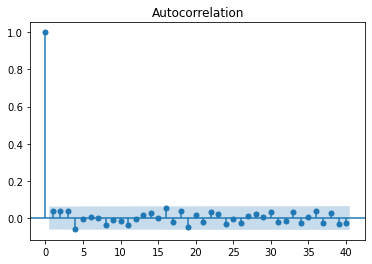

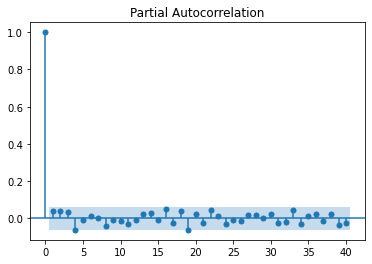

In [46]:
plot_self(series_new, num_log=40)

### 1.1.2 Perform randomness test on the white noise series using the Ljung-Box test.

In [47]:
from random import gauss
from random import seed
import pandas as pd
import statsmodels.api as sm


seed(1)
series_2 = [gauss(0, 1) for i in range(1000)]
series_2 = Series(series_2)
sm.stats.acorr_ljungbox(series_2, lags=[10], return_df=True)

# lb_pvalue > 0.05, then accept the null hypothesiws, meaning that the series are random. 

,lb_stat,lb_pvalue
10,5.723556,0.837929


In [48]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.648359
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


## 1.2 Random-walk series

### 1.2.1 Realize a simple random walk series with N data points (e.g. N can be 100, 1000, 5000, or 10000) starting from an initial value of 0 (y_0 = 0), and x_t = +1,−1.

In [49]:
# set the random generator seed to 1 (None: current system time; int a: is used directly)
import random

seed(1)
sequence = [-1, 1]
random_walk_series = [0]
# Create random variable list x
for i in range(999):
    x = random.choice(sequence)
    random_walk_value = random_walk_series[i] + x
    random_walk_series.append(random_walk_value)

random_walk_series = Series(random_walk_series)

#random_walk_series


### Find itsw actual mean, standard deviation, and draw its line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs (lags up to 40).

In [50]:
#mean
random_walk_series.mean()


3.492

In [51]:
# Standard Deviation
random_walk_series.std()

9.866066859456973

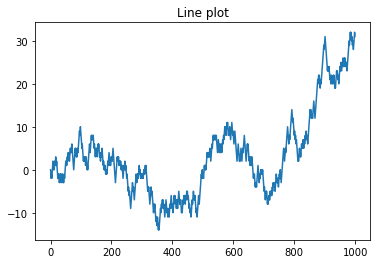

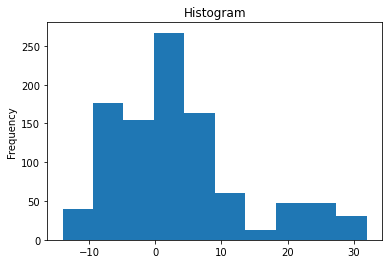

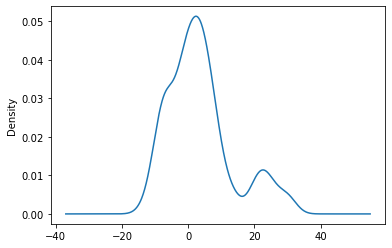

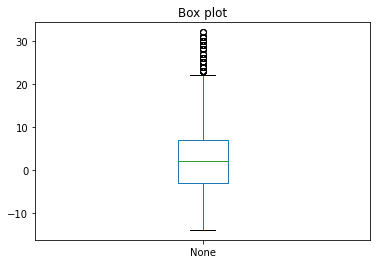

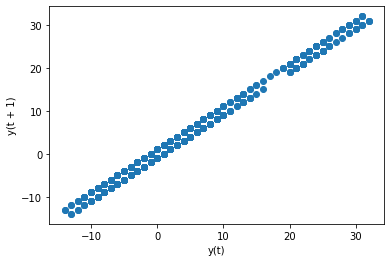

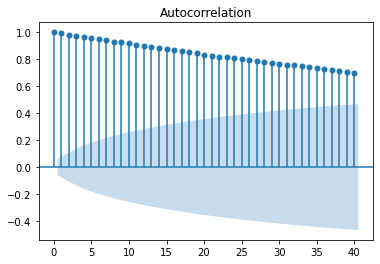

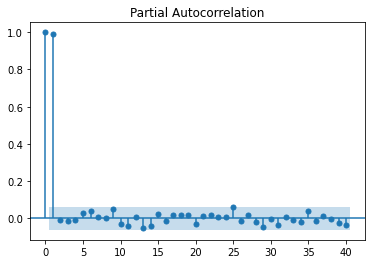

In [52]:
plot_self(random_walk_series, 40)

### 1.2.3 Perform randomness test on the white noise series using the Ljung-Box test.

In [53]:

import statsmodels.api as sm
sm.stats.acorr_ljungbox(random_walk_series, lags=[1], return_df=True)

# lb_pvalue < 0.05, then reject the null hypothesiws, meaning that the series are not random. 

,lb_stat,lb_pvalue
1,984.851022,3.524787e-216


In [54]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(random_walk_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


# P-value is larger than 0.05,

ADF Statistic: -0.406746
p-value: 0.908966
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


## 1.3 Global land temperature anomalies series

### 1.3.1 Use the global land temperature anomalies data to draw line plot, histogram, density plot, box-plot, heatmap, lag-1 plot, auto-correlation function (acf) and partial acf (pacf) graphs (lags up to 40).

In [55]:
from pandas import read_excel
dataset = read_excel('global-land-temperature-anomalies-1880-2020-data.xlsx', 'Data')
print(dataset)

     Unnamed: 0                                         Unnamed: 1  Unnamed: 2
0           NaN                                                NaN         NaN
1           NaN        Global land temperature anomalies 1880-2020         NaN
2           NaN  Annual anomalies in global land surface temper...         NaN
3           NaN                                                NaN         NaN
4           NaN                                               1880       -0.50
..          ...                                                ...         ...
140         NaN                                               2016        1.54
141         NaN                                               2017        1.41
142         NaN                                               2018        1.22
143         NaN                                               2019        1.43
144         NaN                                               2020        1.59

[145 rows x 3 columns]


In [56]:
dataset.columns = ['Na', 'year', 'temperature']
print(dataset)

     Na                                               year  temperature
0   NaN                                                NaN          NaN
1   NaN        Global land temperature anomalies 1880-2020          NaN
2   NaN  Annual anomalies in global land surface temper...          NaN
3   NaN                                                NaN          NaN
4   NaN                                               1880        -0.50
..   ..                                                ...          ...
140 NaN                                               2016         1.54
141 NaN                                               2017         1.41
142 NaN                                               2018         1.22
143 NaN                                               2019         1.43
144 NaN                                               2020         1.59

[145 rows x 3 columns]


In [57]:
dataset.drop(columns='Na')

,year,temperature
0,NaN,NaN
1,Global land temperature anomalies 1880-2020,NaN
2,Annual anomalies in global land surface temper...,NaN
3,NaN,NaN
4,1880,-0.50
...,...,...
140,2016,1.54
141,2017,1.41
142,2018,1.22
143,2019,1.43


In [58]:
series_temperature = dataset.iloc[4:145, 2]

series_temperature = Series(data=dataset.iloc[4:145, 2])
series_temperature.index = dataset.iloc[4:145, 1]
#print(series_temperature)

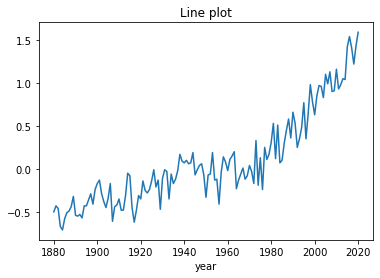

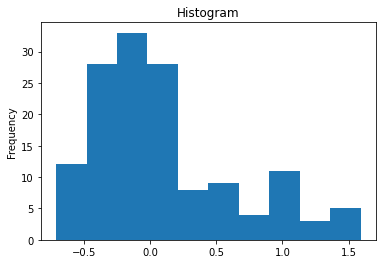

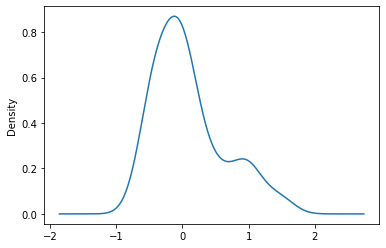

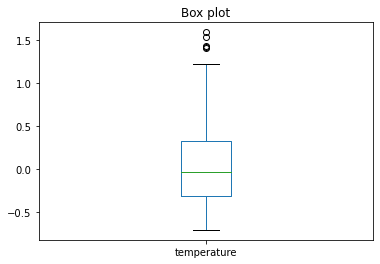

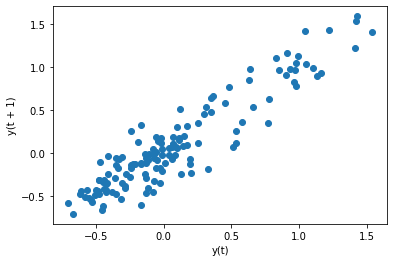

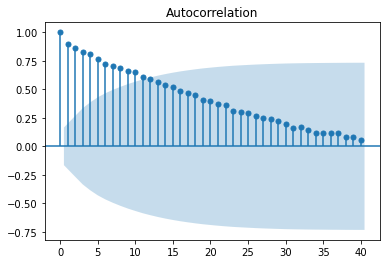

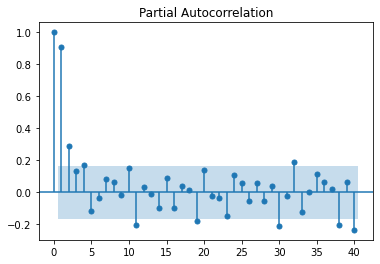

In [59]:
plot_self(series_temperature, 40)

### Take the first order difference of the temperature anomaly dataset. Draw line plot, histogram, density plot, box-plot, heatmap, lag-1 plot, acf and pacf graphs (lags up to 40).

In [60]:
series_temperature_one_order = []
for i in range(0, 140):
    series_temperature_one_order.append(series_temperature[i+1]-series_temperature[i])

#print(series_temperature_one_order)
series_temperature_one_order = Series(series_temperature_one_order)
print(series_temperature_one_order)

0      0.07
1     -0.03
2     -0.21
3     -0.04
4      0.13
       ... 
135    0.12
136   -0.13
137   -0.19
138    0.21
139    0.16
Length: 140, dtype: float64


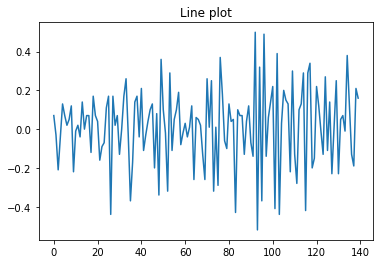

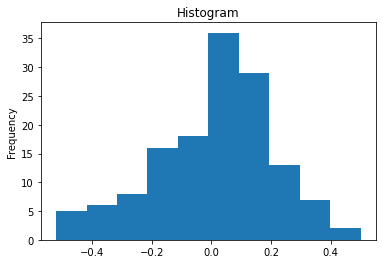

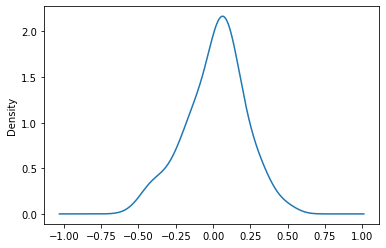

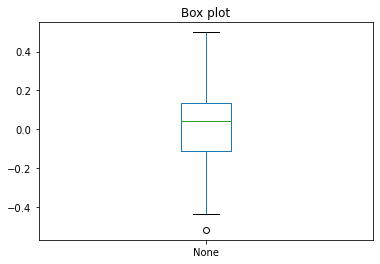

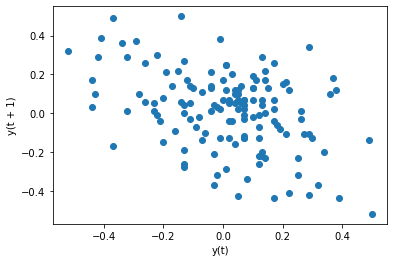

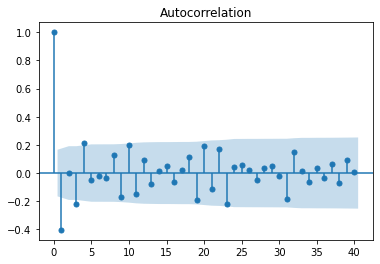

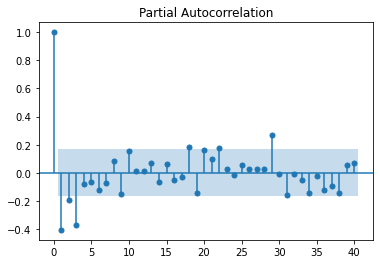

In [61]:
plot_self(series_temperature_one_order, 40)

### Test if the original and the differenced temperature anomaly series are random or not.

In [62]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series_temperature, lags=[1], return_df=True)

# lb_pvalue < 0.05, then reject the null hypothesiws, meaning that the series are not random. 

,lb_stat,lb_pvalue
1,116.259661,4.169678e-27


In [63]:
sm.stats.acorr_ljungbox(series_temperature_one_order, lags=[1], return_df=True)

# lb_pvalue < 0.05, then reject the null hypothesiws, meaning that the series are not random. 

,lb_stat,lb_pvalue
1,23.320097,0.000001


### Test if the original and the differenced temperature anomaly series are stationary or not.

In [64]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_temperature)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.938293
p-value: 0.993570
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


The p-value is more than the significance level of 0.05 and hence we can accept the null hypothesis and judge the series is not stationary.

In [65]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series_temperature_one_order)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.165503
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


The p-value is less than the significance level of 0.05 and hence we can reject the null hypothesis and judge the series is stationary.

### Performance the classical decomposition and STL decomposition on the dataset. 

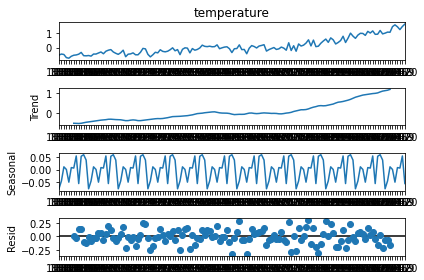

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_temperature, model = 'additive', period=12)
fig = result.plot()

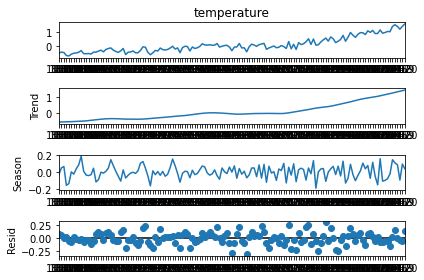

In [67]:
from statsmodels.tsa.seasonal import STL
from matplotlib import pyplot
#import matplotlib.pyplot
res = STL(series_temperature, period = 12).fit()
res.plot()
pyplot.show()

# 2. Feature Extraction

## 2.1 Frequency components of a synthetic time-series signal

Data: Generate a series of five sequential sine wave signals for five seconds, each sine wave lasting 1 second. The nth sine wave signal xn = sin(2π · n · f), where f = 10, and n = 1, 2, 3, 4, 5, i.e., frequency 10Hz, 20Hz, 30Hz, 40Hz and 50Hz. The series is digitalized with a sampling rate is 200 Hz 

In [68]:
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [69]:
sample_rate = 200
time = 0.995
num_sample = sample_rate 
x = np.linspace(0, time, num_sample)
print(x)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [70]:
x_wave = []
wave_matrix = []
for i in range(0, 5):
    x_wave = lambda x:np.sin((i+1)*10*2*np.pi*x)
    wave_matrix.append([x_wave(i) for i in x])
    #wave_matrix[i] = [x_wave(i) for i in x]
#print(wave_matrix)
x_sin = np.concatenate((wave_matrix[0], wave_matrix[1], wave_matrix[2], wave_matrix[3],wave_matrix[4]))
#print(x_sin)
sin_series = Series(x_sin)
sin_series.index = np.linspace(0, 4.995, num_sample*5)
#print(sin_series.index)

### Draw a line plot of the series.

<AxesSubplot:title={'center':'Line plot'}>

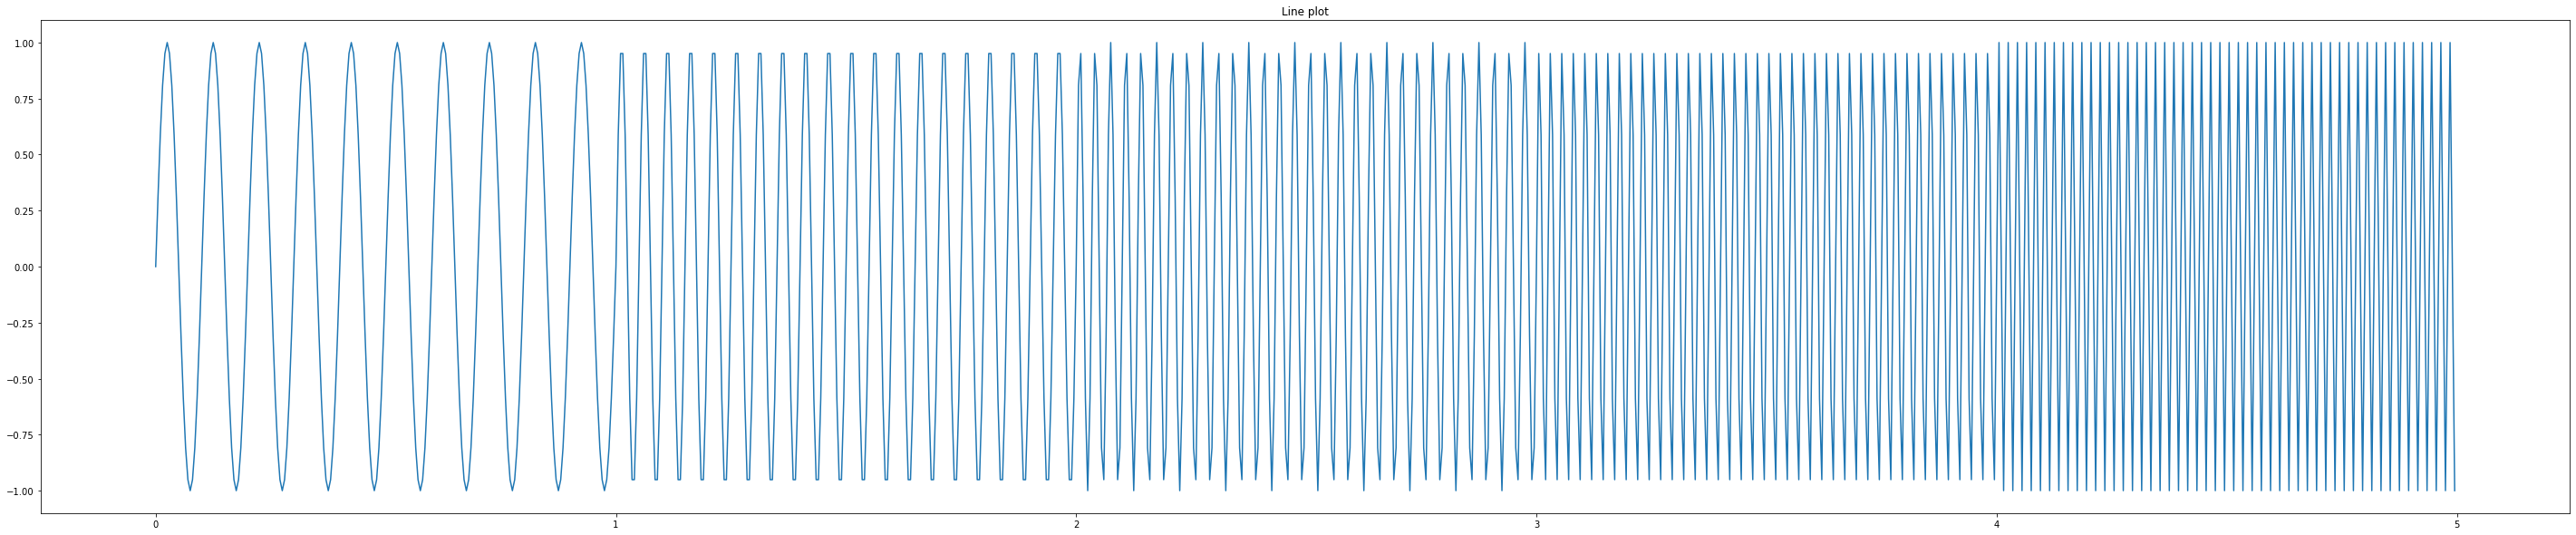

In [71]:
pyplot.figure()
sin_series.plot.line(title = 'Line plot', figsize = (50,10))
    #series.plot.line(Series(wave_matrix[i]))

As the sample rate = 200, is not times of 20hz*4, 30hz*4, 40hz*4, we could find that the vally and peaks will not always captured. 

One thing to notice that the value at T = 5 is ignored.

### Draw power spectrum (power density graph) of the series.

#### Use scipy library "signal"

D:\Anaconda\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


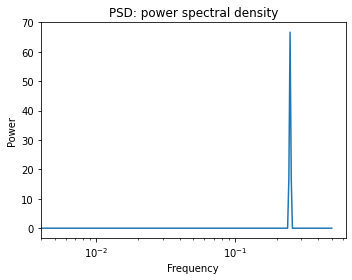

In [72]:
from scipy import signal
freqs, psd = signal.welch(wave_matrix[4])
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

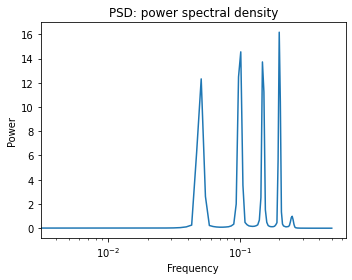

In [73]:
from scipy import signal
freqs, psd = signal.welch(sin_series)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

#### Classical FFT

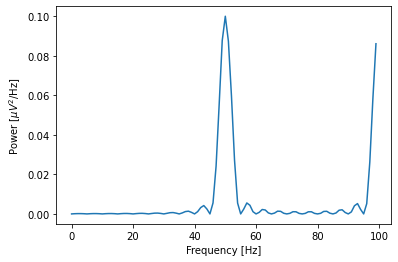

In [74]:
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from pylab import *
from numpy import where
from numpy import conj
dt = 0.005
N = x_sin.shape[0]
T = N * dt
xf = fft(sin_series - sin_series.mean())                  # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * conj(xf)) # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]             # Ignore negative frequencies

df = 1 / 1                      # Determine frequency resolution
fNQ = 1 / dt / 2                        # Determine Nyquist frequency
faxis = arange(0,fNQ,df)                # Construct frequency axis
plot(faxis, real(Sxx))                  # Plot spectrum vs frequency
#xlim([0, 0])                          # Select frequency range
xlabel('Frequency [Hz]')                # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

#### CLassical DTFT

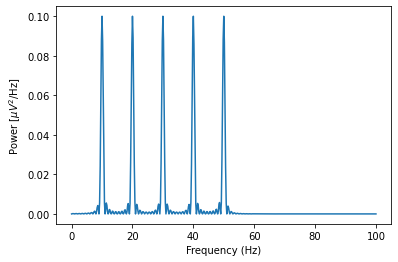

In [75]:
xf = rfft(sin_series - sin_series.mean())
Sxx = (2 * dt ** 2 / T * ( xf * xf.conj() ) ).real
df = 1 / T
fNQ = 1 / dt / 2
faxis = arange(len(Sxx)) * df
plot(faxis, Sxx)
xlabel('Frequency (Hz)')
ylabel('Power [$\mu V^2$/Hz]')
show()

### Draw the spectrogram of the series

In [76]:
# from scipy import signal
# freqs, times, spectrogram = signal.spectrogram(sin_series)
# plt.figure(figsize=(5, 4))
# plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
# plt.title('Spectrogram')
# plt.ylabel('Frequency[Hz]]')
# plt.xlabel('Time[s]')
# plt.tight_layout()

In [77]:
print(sin_series)

0.000    0.000000e+00
0.005    3.090170e-01
0.010    5.877853e-01
0.015    8.090170e-01
0.020    9.510565e-01
             ...     
4.975   -1.000000e+00
4.980    2.352560e-14
4.985    1.000000e+00
4.990   -1.274499e-14
4.995   -1.000000e+00
Length: 1000, dtype: float64


C:\Users\21318\AppData\Local\Temp\ipykernel_17256\3317681330.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(t, f, 10 * np.log10(Sxx),


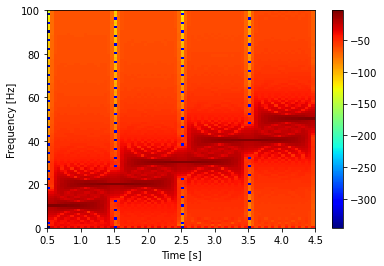

In [78]:
from scipy.signal import spectrogram
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)      # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f, t, Sxx = spectrogram(
    sin_series,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
pcolormesh(t, f, 10 * np.log10(Sxx),
               cmap='jet')# Plot the result
colorbar()                # ... with a color bar,
#xlim([0, 6])
#ylim([0, 70])             # ... set the frequency range,
xlabel('Time [s]')        # ... and label the axes
ylabel('Frequency [Hz]')
#savefig('imgs/3-14')
show()

In [79]:
print(type(sin_series))

<class 'pandas.core.series.Series'>


### Draw and compare the ACF and PACF graphs of the first one-second (frequency 10Hz) and the second one-second series (frequency 20Hz), with lags up to 50.

In [80]:
sin_series.iloc[0:200]

0.000    0.000000
0.005    0.309017
0.010    0.587785
0.015    0.809017
0.020    0.951057
           ...   
0.975   -1.000000
0.980   -0.951057
0.985   -0.809017
0.990   -0.587785
0.995   -0.309017
Length: 200, dtype: float64

In [81]:
sin_series.iloc[200:400]

1.000    0.000000e+00
1.005    5.877853e-01
1.010    9.510565e-01
1.015    9.510565e-01
1.020    5.877853e-01
             ...     
1.975    8.328836e-15
1.980   -5.877853e-01
1.985   -9.510565e-01
1.990   -9.510565e-01
1.995   -5.877853e-01
Length: 200, dtype: float64

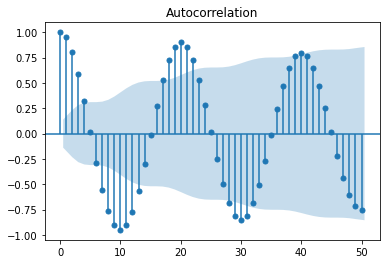

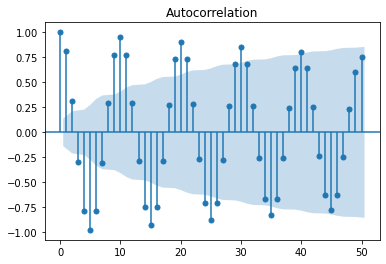

In [82]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sin_series.iloc[0:200], lags=50)
pyplot.show()

plot_acf(sin_series.iloc[200:400], lags=50)
pyplot.show()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


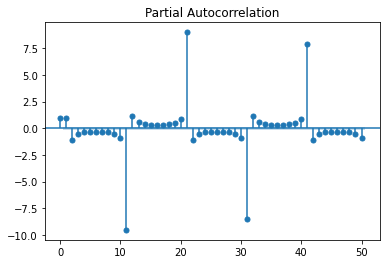

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


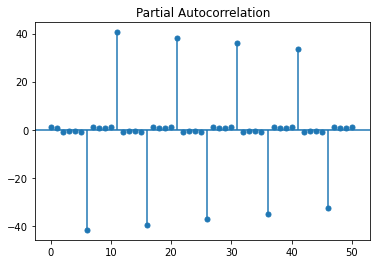

In [83]:
plot_pacf(sin_series.iloc[0:200], lags=50)
pyplot.show()

plot_pacf(sin_series.iloc[200:400], lags=50)
pyplot.show()

## 2.2 Statistical features and discovery of event-related potential

### Visualize the response, i.e., ERP of the EEG, in the two conditions, A and B.

In [84]:
from scipy.io import loadmat       # Import function to read data.
from pylab import *                # Import numerical and plotting functions
from pylab import sqrt
from matplotlib import rcParams
rcParams['figure.figsize']=(12,3)

In [85]:
data = loadmat('02_EEG-1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [86]:
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

In [87]:
#print(data['t'].shape)
#print(t.shape)
#print(len(data['t']))
#print(len(data['t'][0]))

 average the EEG responses across trials. 

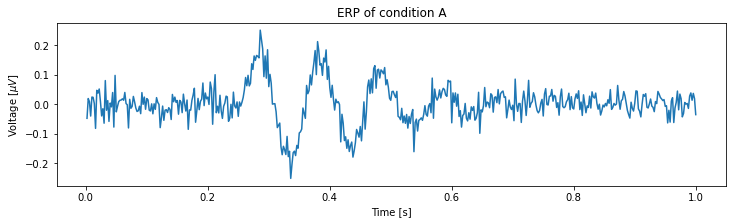

In [88]:
plot(t, EEGa.mean(0))        # Plot the ERP of condition A
xlabel('Time [s]')           # Label the axes
ylabel('Voltage [$\mu V$]')
title('ERP of condition A')  # ... provide a title
#savefig('imgs/2-5')
show()                       # ... and show the plot

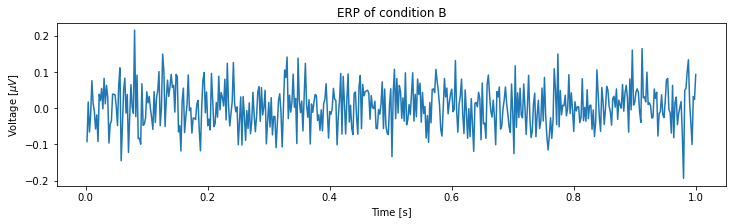

In [89]:
plot(t, EEGb.mean(0))        # Plot the ERP of condition A
xlabel('Time [s]')           # Label the axes
ylabel('Voltage [$\mu V$]')
title('ERP of condition B')  # ... provide a title
#savefig('imgs/2-5')
show()                       # ... and show the plot

In [90]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)
sd = EEGa.std(0)  # Compute the std across trials
ntrials = len(EEGa) 
sdmn = sd / sqrt(ntrials) 

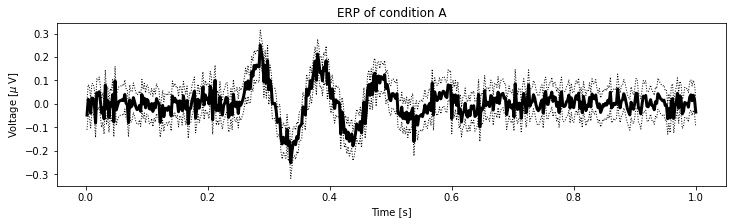

In [91]:
fig, ax = subplots(figsize=(12, 3))    # Save the axes for use in later cells and resize the figure
ax.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
ax.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
ax.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
xlabel('Time [s]')                     # Label the axes
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')            # ... provide a useful title
fig                                    # ... and show the plot
show()

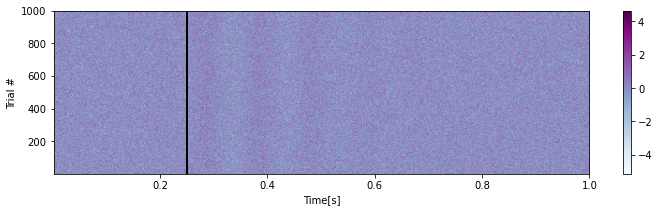

In [92]:
imshow(EEGa,                                   # Image the data from condition A.
           cmap='BuPu',                            # ... set the colormap (optional)
           extent=[t[0], t[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
xlabel('Time[s]')                              # Label the axes
ylabel('Trial #')
colorbar()                                     # Show voltage to color mapping
vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line
#savefig('imgs/2-4')
show()

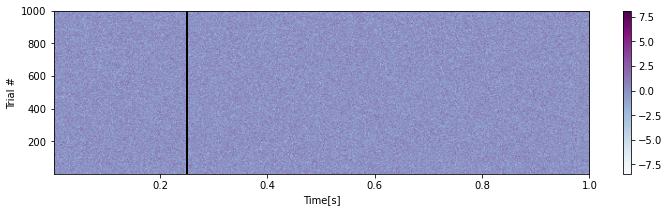

In [93]:
imshow(EEGb,                                   # Image the data from condition A.
           cmap='BuPu',                            # ... set the colormap (optional)
           extent=[t[0], t[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
xlabel('Time[s]')                              # Label the axes
ylabel('Trial #')
colorbar()                                     # Show voltage to color mapping
vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line
#savefig('imgs/2-4')
show()

### Find the brain activity frequency in the data of condition A (see below for condition A and B).

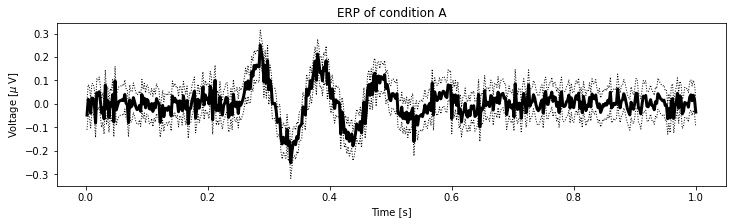

In [94]:
fig, ax = subplots(figsize=(12, 3))    # Save the axes for use in later cells and resize the figure
ax.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
ax.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
ax.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
xlabel('Time [s]')                     # Label the axes
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')            # ... provide a useful title
fig                                    # ... and show the plot
show()

In [95]:
# Create a function to label plots
def labelPlot(title_string="Title"):
    '''
    A function that labels the x-axis as 'Time [s]' and
    the y-axis as 'Voltage [$\mu V$]'. 
    Arguments:
        title_string:  string variable to be used as
                       the plot title (default: 'Title')
                       
    '''
    xlabel('Time [s]')           # x-axis is time
    ylabel('Voltage [$/mu V$]')  # y-axis is voltage
    title(title_string)          # use the input here
    autoscale(tight=True)        # no white-space in plot

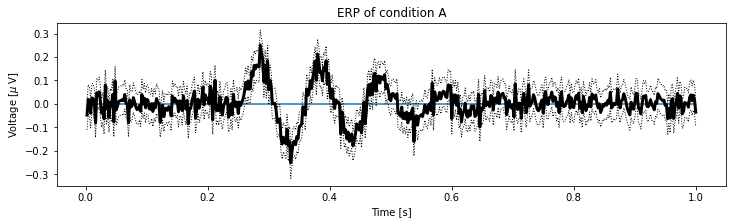

In [96]:
ax.hlines(0, t[0], t[-1])
#fig.savefig('imgs/2-7')
fig

We find three time intervals at which the confidence intervals of the ERP do not include zero: near 0.27 s, near 0.37 s, and near 0.47 s.

In [97]:
dt_brain = data['t'][0][1] - data['t'][0][0]
N_brain = EEGa.shape[1]
#print(dt_brain)
#print(N_brain)
T_brain = dt_brain * N

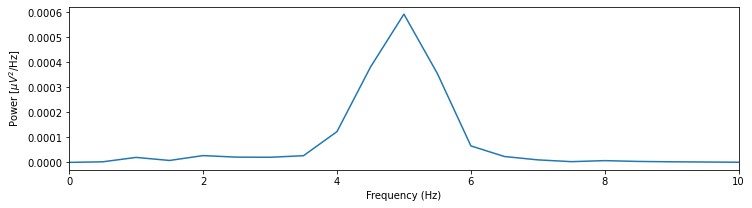

In [112]:
brain_f = rfft(EEGa.mean(0) - mn.mean())
Sxx_brain = (2 * dt_brain ** 2 / T_brain * ( brain_f * brain_f.conj() ) ).real
df_brain = 1 / T_brain
fNQ = 1 / dt / 2
faxis = arange(len(Sxx_brain)) * df_brain
xlim(0, 10)
plot(faxis, Sxx_brain)
xlabel('Frequency (Hz)')
ylabel('Power [$\mu V^2$/Hz]')
show()

## 2.3. Features of observed rhythms in EEG

In [99]:
from scipy.io import loadmat                    # To load .mat files
from pylab import *                             # Import plotting functions
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)               # Change the default figure size

### For the EEG data set, draw the line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs (lags up to 50).

In [100]:
data = loadmat('03_EEG-1.mat')  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable
EEG_series = Series(EEG)
EEG_series.index = t
#print(EEG_series)

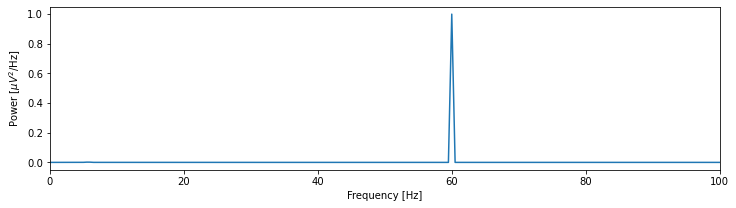

In [101]:
data = loadmat('03_EEG-1.mat')  # Load the EEG data
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

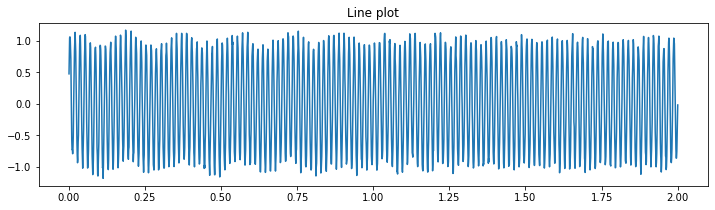

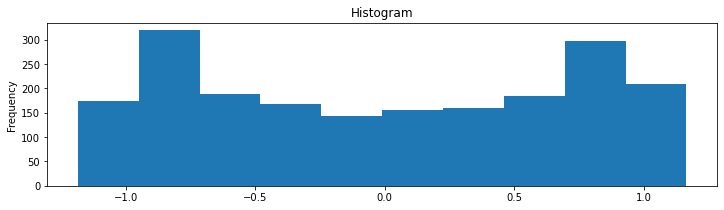

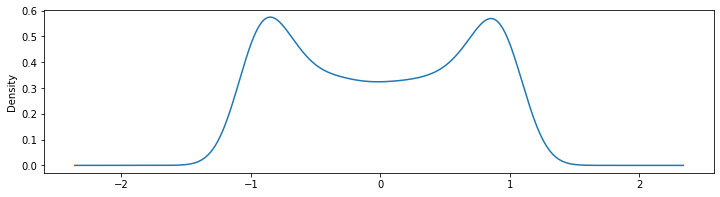

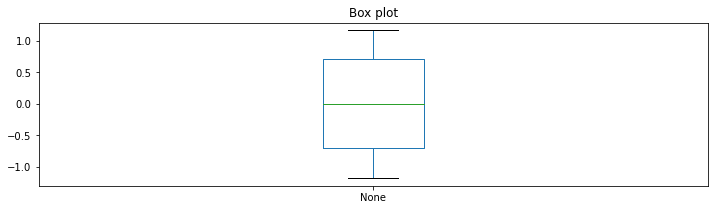

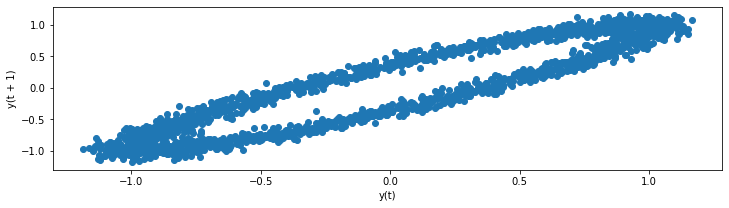

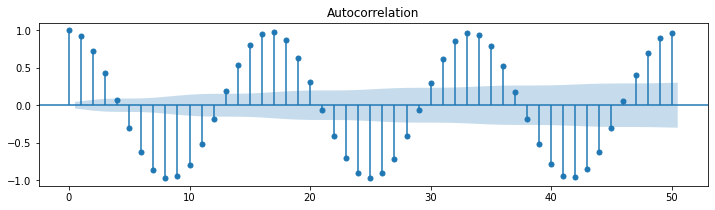

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


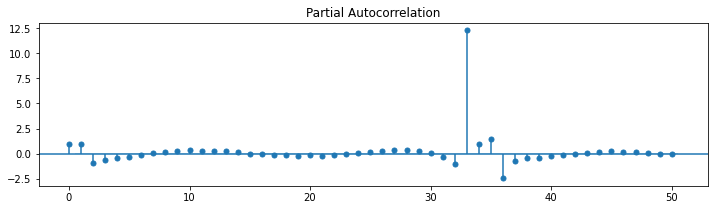

In [102]:
plot_self(EEG_series, 50)

### Show the statistical characteristics of the EEG data, such as mean, variance, standard deviation.

In [103]:
print('Mean: ', EEG_series.mean())
print('Variance: ', EEG_series.var())
print('Standard deviation: ', EEG_series.std())

Mean:  2.481868877080018e-17
Variance:  0.5049697256484698
Standard deviation:  0.7106122188989363


### Compute the auto-covariance of the EEG data. Draw and save the auto-covariance graph. Examine the auto-covariance plot, Why does the auto-covariance exhibit repeated peaks and troughs approximately every 0.0166 s?

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

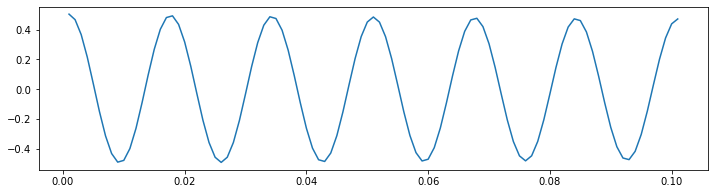

In [104]:
from statsmodels.tsa.stattools import acovf
result = acovf(EEG_series, nlag=100)
auto_cov_series = Series(result)
auto_cov_series.index = EEG_series.index[0: 101]
#EEG_series.index[0:200]
auto_cov_series.plot.line()

We can oberve that in 0.1s. the peaks repeat for 6 times. The auto-covariance exhibit repeated peaks and troughs approximately every 0.0166 s because EEG signal is periodic, and the period is approximately about 0.01666s.

Another method from the website:

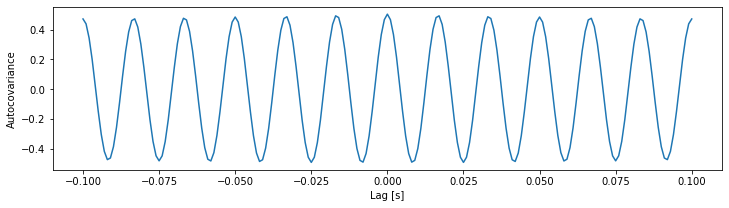

In [105]:
lags = arange(-len(x) + 1, len(x))    # Compute the lags for the full autocovariance vector
                                      # ... and the autocov for L +/- 100 indices
ac = 1 / N * correlate(x - x.mean(), x - x.mean(), mode='full')
inds = abs(lags) <= 100               # Find the lags that are within 100 time steps
plot(lags[inds] * dt, ac[inds])       # ... and plot them
xlabel('Lag [s]')                     # ... with axes labelled
ylabel('Autocovariance')
#savefig('imgs/3-4a')
show()

### Compute and plot the power-spectrum of the EEG data. Show it in both linear scale and log (dB) scale. To emphasize low-amplitude rhythms hidden by large-amplitude oscillations is to change the scale of the spectrum to decibels.

#### Linear scale

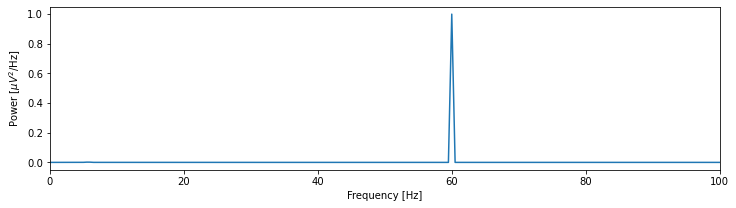

In [106]:
xf = fft(x - x.mean())                  # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * conj(xf)) # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]             # Ignore negative frequencies

df = 1 / T.max()                        # Determine frequency resolution
fNQ = 1 / dt / 2                        # Determine Nyquist frequency
faxis = arange(0,fNQ,df)                # Construct frequency axis

plot(faxis, real(Sxx))                  # Plot spectrum vs frequency
xlim([0, 100])                          # Select frequency range
xlabel('Frequency [Hz]')                # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

#### Log scale

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


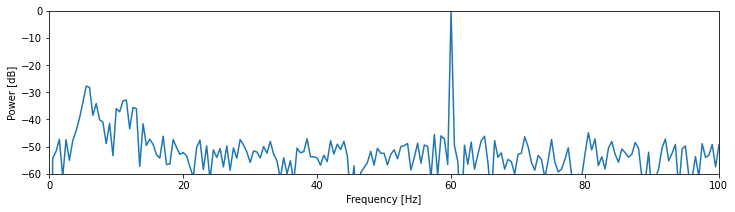

In [107]:
plot(faxis, 10 * log10(Sxx / max(Sxx)))  # Plot the spectrum in decibels.
xlim([0, 100])                           # Select the frequency range.
ylim([-60, 0])                           # Select the decibel range.
xlabel('Frequency [Hz]')                 # Label the axes.
ylabel('Power [dB]')
#savefig('imgs/3-13a')
show()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


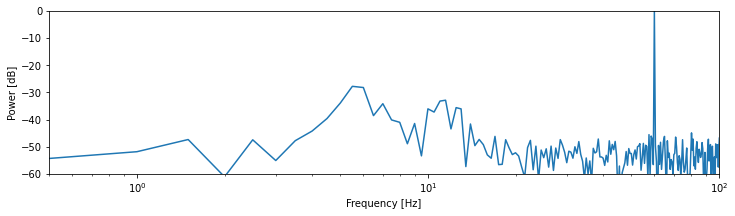

In [108]:
semilogx(faxis, 10 * log10(Sxx / max(Sxx)))  # Log-log scale
xlim([df, 100])                              # Select frequency range
ylim([-60, 0])                               # ... and the decibel range.
xlabel('Frequency [Hz]')                     # Label the axes.
ylabel('Power [dB]')
show()

In [109]:
time_series = [1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1]

[ 4.72888889  3.55081481  2.07496296  0.50133333 -0.97007407 -2.13925926
 -2.80622222 -2.77096296 -1.83348148 -0.93155556 -0.13185185  0.49896296
  0.89422222  0.98725926  0.71140741]


D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

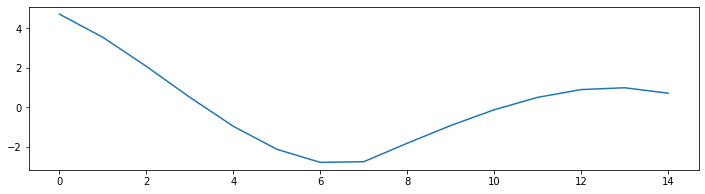

In [120]:
from statsmodels.tsa.stattools import acovf
result = acovf(time_series)
auto_cov_series = Series(result)
print(np.array(result))
#EEG_series.index[0:200]
auto_cov_series.plot.line()

In [123]:
Series.plot.line(Series(result))

TypeError: 'Series' object is not callable

In [121]:
np.array(result)

array([ 4.72888889,  3.55081481,  2.07496296,  0.50133333, -0.97007407,
       -2.13925926, -2.80622222, -2.77096296, -1.83348148, -0.93155556,
       -0.13185185,  0.49896296,  0.89422222,  0.98725926,  0.71140741])

In [119]:
import statsmodels.api as sm
sm.tsa. acf(time_series)

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.75087719,  0.43878446,  0.10601504, -0.20513784,
       -0.45238095, -0.59342105, -0.58596491, -0.3877193 , -0.19699248,
       -0.02788221,  0.10551378,  0.18909774,  0.20877193,  0.1504386 ])

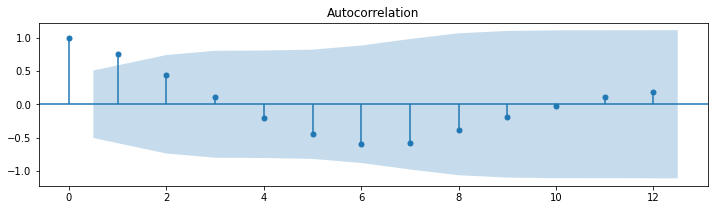

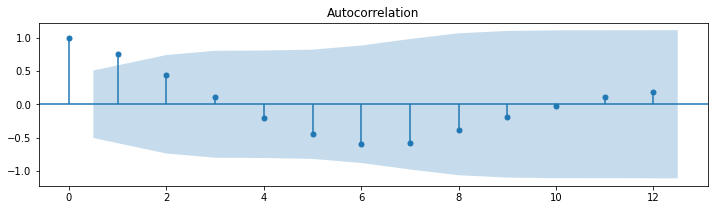

In [111]:
plot_acf(Series(time_series))

In [113]:
import numpy as np

Xi = np.array([1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1])
N = np.size(Xi)
k = 5
Xs = np.average(Xi)

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

print("Autocovariance:", autocovariance(Xi, N, k, Xs))

Autocovariance: -2.292063492063492


In [118]:
var = 0
for i in range(0, 14):
    var = var + (Xi[i] - 64 / 15) * (Xi[i+1] - 64 / 15)

var / 15

3.5508148148148146